In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import os
from itertools import product
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

In [10]:
# df = pd.read_csv('C:\\Users\\RFlamenb\\OneDrive - Sempra Energy\\documents\\SMU\\Data_Mining_MSDS7331\\Project2\\data\\CityOfSanDiegoCrime.csv')

In [11]:
# df.to_pickle('C:\\Users\\RFlamenb\\OneDrive - Sempra Energy\\documents\\SMU\\Data_Mining_MSDS7331\\Project2\\data\\df.pkl')

In [12]:
pd.set_option('display.max_columns', None)
dfp = pd.read_pickle('C:\\Users\\RFlamenb\\OneDrive - Sempra Energy\\documents\\SMU\\Data_Mining_MSDS7331\\Project2\\data\\df.pkl')
dfp.head()

,TRACTCE10,BLOCKCE10,INTPTLAT10,INTPTLON10,POP100,HU100,date,year,month,day,week,dow,time,hour,address,is_night,type,city,nbrhood,community,comm_pop,asr_zone,council,council_pop,lampdist,desc_,lat,lon,SHAPE_Length,SHAPE_Area,Crime_Indicator,NEAR_FID,NEAR_DIST,Jurisdiction,Jurisdiction_1,Jurisdiction_Population,Council_1,PovertyPercentage_1,PCT_Male_Unemployed,PCT_Female_Unemployed,PCT_NonHSGrad,PCT_American_Indian,PCT_Asian,PCT_Black,PCT_Hispanic,PCT_Other,PCT_Pacific_Islander,PCT_Two_or_More,PCT_White
0,9804,3001,32.813700,-117.014581,54.0,20.0,4/29/2008 0:00:00,2008,4,3041,17,2,12/30/1899 7:30:00,7,7300 Block Ballinger Avenue,0,BURGLARY,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,6403,RESIDENTIAL BURGLARY,32.813874,-117.014941,571.622427,16114.159847,1,14,3597.580959,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443
1,9804,3001,32.813700,-117.014581,54.0,20.0,5/27/2008 0:00:00,2008,5,3069,21,2,12/30/1899 21:30:00,21,7300 Block Ballinger Avenue,1,VANDALISM,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,6403,VANDALISM (LESS THAN $400),32.813874,-117.014941,571.622427,16114.159847,1,14,3597.580959,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443
2,9804,2008,32.805035,-117.018472,43.0,15.0,6/30/2008 0:00:00,2008,6,3103,26,1,12/30/1899 7:20:00,7,8200 Block Whelan Drive,0,BURGLARY,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,2236,RESIDENTIAL BURGLARY,32.805411,-117.018891,481.593684,12739.887581,1,24,4131.774898,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443
3,9804,2008,32.805035,-117.018472,43.0,15.0,8/29/2008 0:00:00,2008,8,3163,34,5,12/30/1899 17:30:00,17,8200 Block Whelan Drive,0,BURGLARY,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,2236,RESIDENTIAL BURGLARY,32.805411,-117.018891,481.593684,12739.887581,1,24,4131.774898,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443
4,9804,2008,32.805035,-117.018472,43.0,15.0,11/22/2009 0:00:00,2009,11,3613,46,0,12/30/1899 18:00:00,18,8200 Block Whelan Drive,1,FRAUD,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,2236,FRAUD,32.805411,-117.018891,481.593684,12739.887581,1,24,4131.774898,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443


In [13]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361945 entries, 0 to 361944
Data columns (total 49 columns):
TRACTCE10                  361945 non-null int64
BLOCKCE10                  361945 non-null int64
INTPTLAT10                 361945 non-null float64
INTPTLON10                 361945 non-null float64
POP100                     361945 non-null float64
HU100                      361945 non-null float64
date                       361945 non-null object
year                       361945 non-null int64
month                      361945 non-null int64
day                        361945 non-null int64
week                       361945 non-null int64
dow                        361945 non-null int64
time                       361945 non-null object
hour                       361945 non-null int64
address                    361945 non-null object
is_night                   361945 non-null int64
type                       361945 non-null object
city                       361945 non-null o

In [14]:
dups = dfp.duplicated(subset=None, keep='first').sum()

print('Duplicate Records:',dups)

Duplicate Records: 140


In [15]:
dfp.isnull().sum()

TRACTCE10                   0
BLOCKCE10                   0
INTPTLAT10                  0
INTPTLON10                  0
POP100                      0
HU100                       0
date                        0
year                        0
month                       0
day                         0
week                        0
dow                         0
time                        0
hour                        0
address                     0
is_night                    0
type                        0
city                        0
nbrhood                     0
community                   0
comm_pop                    0
asr_zone                    0
council                     0
council_pop                 0
lampdist                    0
desc_                      34
lat                         0
lon                         0
SHAPE_Length                0
SHAPE_Area                  0
Crime_Indicator             0
NEAR_FID                    0
NEAR_DIST                   0
Jurisdicti

In [81]:
#sd = dfp[dfp['Jurisdiction'] == 'San Diego'] Not needed for new data set. Add back in if reverting to full county data.
#sd.head()

,TRACTCE10,BLOCKCE10,INTPTLAT10,INTPTLON10,POP100,HU100,date,year,month,day,week,dow,time,hour,address,is_night,type,city,nbrhood,community,comm_pop,asr_zone,council,council_pop,lampdist,desc_,lat,lon,SHAPE_Area,PovertyPercentage,Crime_Indicator,LawEnf_ID,LawEnf_Facility_Distance,Jurisdiction,HISPANIC,Jurisdiction_1,BLACK,AMERICAN_INDIAN,WHITE,ASIAN,OTHER,PACIFIC_ISLANDER,Jurisdiction_Population,TWO_OR_MORE,MdeAge_HISPANIC,MedAge_BLACK,MedAge_ASIAN,MedAgeWHITE,MedAge_AMERICAN_INDIAN,MedAge_OTHER,MedAge_PACIFIC_ISLANDER,MedAge_TWO_OR_MORE
45,9804,3001,32.813700,-117.014581,54,20,4/29/2008,2008.0,4.0,3041.0,17.0,2.0,12/30/1899 7:30:00,7.0,7300 Block Ballinger Avenue,0.0,BURGLARY,SndSAN,SanLAK,SanNAV,48313.0,1.0,San007,147442.0,6403.0,RESIDENTIAL BURGLARY,32.813874,-117.014941,16114.15985,0.1417,1,14,3597.580959,San Diego,374977.0,San Diego,81340.0,3469.0,586799.0,204010.0,3283.0,5136.0,1298334.0,42603.0,27.4,33.7,34.4,39.8,33.9,28.2,33.1,21.9
46,9804,3001,32.813700,-117.014581,54,20,5/27/2008,2008.0,5.0,3069.0,21.0,2.0,12/30/1899 21:30:00,21.0,7300 Block Ballinger Avenue,1.0,VANDALISM,SndSAN,SanLAK,SanNAV,48313.0,1.0,San007,147442.0,6403.0,VANDALISM (LESS THAN $400),32.813874,-117.014941,16114.15985,0.1417,1,14,3597.580959,San Diego,374977.0,San Diego,81340.0,3469.0,586799.0,204010.0,3283.0,5136.0,1298334.0,42603.0,27.4,33.7,34.4,39.8,33.9,28.2,33.1,21.9
47,9804,2008,32.805035,-117.018472,43,15,6/30/2008,2008.0,6.0,3103.0,26.0,1.0,12/30/1899 7:20:00,7.0,8200 Block Whelan Drive,0.0,BURGLARY,SndSAN,SanLAK,SanNAV,48313.0,1.0,San007,147442.0,2236.0,RESIDENTIAL BURGLARY,32.805411,-117.018892,12739.88758,0.1417,1,24,4131.774898,San Diego,374977.0,San Diego,81340.0,3469.0,586799.0,204010.0,3283.0,5136.0,1298334.0,42603.0,27.4,33.7,34.4,39.8,33.9,28.2,33.1,21.9
48,9804,2008,32.805035,-117.018472,43,15,8/29/2008,2008.0,8.0,3163.0,34.0,5.0,12/30/1899 17:30:00,17.0,8200 Block Whelan Drive,0.0,BURGLARY,SndSAN,SanLAK,SanNAV,48313.0,1.0,San007,147442.0,2236.0,RESIDENTIAL BURGLARY,32.805411,-117.018892,12739.88758,0.1417,1,24,4131.774898,San Diego,374977.0,San Diego,81340.0,3469.0,586799.0,204010.0,3283.0,5136.0,1298334.0,42603.0,27.4,33.7,34.4,39.8,33.9,28.2,33.1,21.9
49,9804,2008,32.805035,-117.018472,43,15,11/22/2009,2009.0,11.0,3613.0,46.0,0.0,12/30/1899 18:00:00,18.0,8200 Block Whelan Drive,1.0,FRAUD,SndSAN,SanLAK,SanNAV,48313.0,1.0,San007,147442.0,2236.0,FRAUD,32.805411,-117.018892,12739.88758,0.1417,1,24,4131.774898,San Diego,374977.0,San Diego,81340.0,3469.0,586799.0,204010.0,3283.0,5136.0,1298334.0,42603.0,27.4,33.7,34.4,39.8,33.9,28.2,33.1,21.9


In [67]:
#ctype = pd.get_dummies(dfp['type'],drop_first=False) Do not take dummies of crime types. We will use this table for predictions
#ctype.head()

,ARSON,ASSAULT,BURGLARY,DRUGS/ALCOHOL VIOLATIONS,DUI,FRAUD,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX CRIMES,THEFT/LARCENY,VANDALISM,VEHICLE BREAK-IN/THEFT,WEAPONS
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
lawd = dfp['LawEnf_Facility_Distance']
lawd.plot(kind='hist', range=[0, 5000])

KeyError: 'LawEnf_Facility_Distance'

In [69]:
#dfp['LawCats'] = pd.cut(dfp.LawEnf_Facility_Distance,[0,1000,3000,5000,1000000],4,labels=['1km_or_Less','1-3km','3-5km','5km_and_above']) # this creates new variables
#dfp.LawCats.describe() #Add back in tomorrow

count     737138
unique         4
top        1-3km
freq      337259
Name: LawCats, dtype: object

In [17]:
dfp.head()

,TRACTCE10,BLOCKCE10,INTPTLAT10,INTPTLON10,POP100,HU100,date,year,month,day,week,dow,time,hour,address,is_night,type,city,nbrhood,community,comm_pop,asr_zone,council,council_pop,lampdist,desc_,lat,lon,SHAPE_Length,SHAPE_Area,Crime_Indicator,NEAR_FID,NEAR_DIST,Jurisdiction,Jurisdiction_1,Jurisdiction_Population,Council_1,PovertyPercentage_1,PCT_Male_Unemployed,PCT_Female_Unemployed,PCT_NonHSGrad,PCT_American_Indian,PCT_Asian,PCT_Black,PCT_Hispanic,PCT_Other,PCT_Pacific_Islander,PCT_Two_or_More,PCT_White
0,9804,3001,32.813700,-117.014581,54.0,20.0,4/29/2008 0:00:00,2008,4,3041,17,2,12/30/1899 7:30:00,7,7300 Block Ballinger Avenue,0,BURGLARY,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,6403,RESIDENTIAL BURGLARY,32.813874,-117.014941,571.622427,16114.159847,1,14,3597.580959,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443
1,9804,3001,32.813700,-117.014581,54.0,20.0,5/27/2008 0:00:00,2008,5,3069,21,2,12/30/1899 21:30:00,21,7300 Block Ballinger Avenue,1,VANDALISM,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,6403,VANDALISM (LESS THAN $400),32.813874,-117.014941,571.622427,16114.159847,1,14,3597.580959,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443
2,9804,2008,32.805035,-117.018472,43.0,15.0,6/30/2008 0:00:00,2008,6,3103,26,1,12/30/1899 7:20:00,7,8200 Block Whelan Drive,0,BURGLARY,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,2236,RESIDENTIAL BURGLARY,32.805411,-117.018891,481.593684,12739.887581,1,24,4131.774898,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443
3,9804,2008,32.805035,-117.018472,43.0,15.0,8/29/2008 0:00:00,2008,8,3163,34,5,12/30/1899 17:30:00,17,8200 Block Whelan Drive,0,BURGLARY,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,2236,RESIDENTIAL BURGLARY,32.805411,-117.018891,481.593684,12739.887581,1,24,4131.774898,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443
4,9804,2008,32.805035,-117.018472,43.0,15.0,11/22/2009 0:00:00,2009,11,3613,46,0,12/30/1899 18:00:00,18,8200 Block Whelan Drive,1,FRAUD,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,2236,FRAUD,32.805411,-117.018891,481.593684,12739.887581,1,24,4131.774898,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443


In [12]:
lawDist = pd.get_dummies(dfp['LawCats'],drop_first=False)
lawDist.head()

,1km_or_Less,1-3km,3-5km,5km_and_above
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [20]:
#dfpd = pd.concat([dfp,ctype,lawDist],axis=1) Pull out ctype. Run again when lawDist is re-added to the table
#dfpd.head()

In [21]:
date_dfpd = dfp[['date','year','month','day','week','dow','hour','time']] # Change dfp back to dfpd
date_dfpd.head()

,date,year,month,day,week,dow,hour,time
0,4/29/2008 0:00:00,2008,4,3041,17,2,7,12/30/1899 7:30:00
1,5/27/2008 0:00:00,2008,5,3069,21,2,21,12/30/1899 21:30:00
2,6/30/2008 0:00:00,2008,6,3103,26,1,7,12/30/1899 7:20:00
3,8/29/2008 0:00:00,2008,8,3163,34,5,17,12/30/1899 17:30:00
4,11/22/2009 0:00:00,2009,11,3613,46,0,18,12/30/1899 18:00:00


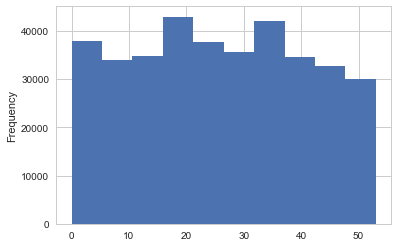

In [22]:
week_sig = date_dfpd['week']
week_sig.plot(kind='hist')

In [23]:
date_dfpd = date_dfpd[['month','week','dow','hour']]

In [24]:
month_dum = pd.get_dummies(date_dfpd['month'],drop_first=False)
month_dum.rename(columns={1.0: 'Jan', 2.0: 'Feb', 3.0:'Mar', 4.0:'Apr', 5.0:'May', 6.0:'June', 7.0:'July',
                        8.0:'Aug', 9.0:'Sept', 10.0:'Oct', 11.0:'Nov', 12.0:'Dec'}, inplace=True)
month_dum.head()

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
week_dum = pd.get_dummies(date_dfpd['week'],drop_first=False)
week_dum = week_dum.add_prefix('W')
week_dum.head(10)

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
dow_dum = pd.get_dummies(date_dfpd['dow'],drop_first=False)
dow_dum.rename(columns={0.0:'Sun', 1.0:'Mon', 2.0: 'Tues', 3.0:'Wed', 4.0:'Thurs', 5.0:'Fri', 6.0:'Sat'}, inplace=True)
dow_dum.head()

,Sun,Mon,Tues,Wed,Thurs,Fri,Sat
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0


In [27]:
date_cols = pd.concat([month_dum,dow_dum,week_dum],axis=1)
date_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361945 entries, 0 to 361944
Data columns (total 73 columns):
Jan      361945 non-null uint8
Feb      361945 non-null uint8
Mar      361945 non-null uint8
Apr      361945 non-null uint8
May      361945 non-null uint8
June     361945 non-null uint8
July     361945 non-null uint8
Aug      361945 non-null uint8
Sept     361945 non-null uint8
Oct      361945 non-null uint8
Nov      361945 non-null uint8
Dec      361945 non-null uint8
Sun      361945 non-null uint8
Mon      361945 non-null uint8
Tues     361945 non-null uint8
Wed      361945 non-null uint8
Thurs    361945 non-null uint8
Fri      361945 non-null uint8
Sat      361945 non-null uint8
W0       361945 non-null uint8
W1       361945 non-null uint8
W2       361945 non-null uint8
W3       361945 non-null uint8
W4       361945 non-null uint8
W5       361945 non-null uint8
W6       361945 non-null uint8
W7       361945 non-null uint8
W8       361945 non-null uint8
W9       361945 non-n

In [28]:
dfpd = pd.concat([dfp,date_cols],axis=1) #Add lawDist back in tomorrow
dfpd.head()

,TRACTCE10,BLOCKCE10,INTPTLAT10,INTPTLON10,POP100,HU100,date,year,month,day,week,dow,time,hour,address,is_night,type,city,nbrhood,community,comm_pop,asr_zone,council,council_pop,lampdist,desc_,lat,lon,SHAPE_Length,SHAPE_Area,Crime_Indicator,NEAR_FID,NEAR_DIST,Jurisdiction,Jurisdiction_1,Jurisdiction_Population,Council_1,PovertyPercentage_1,PCT_Male_Unemployed,PCT_Female_Unemployed,PCT_NonHSGrad,PCT_American_Indian,PCT_Asian,PCT_Black,PCT_Hispanic,PCT_Other,PCT_Pacific_Islander,PCT_Two_or_More,PCT_White,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53
0,9804,3001,32.813700,-117.014581,54.0,20.0,4/29/2008 0:00:00,2008,4,3041,17,2,12/30/1899 7:30:00,7,7300 Block Ballinger Avenue,0,BURGLARY,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,6403,RESIDENTIAL BURGLARY,32.813874,-117.014941,571.622427,16114.159847,1,14,3597.580959,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9804,3001,32.813700,-117.014581,54.0,20.0,5/27/2008 0:00:00,2008,5,3069,21,2,12/30/1899 21:30:00,21,7300 Block Ballinger Avenue,1,VANDALISM,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,6403,VANDALISM (LESS THAN $400),32.813874,-117.014941,571.622427,16114.159847,1,14,3597.580959,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9804,2008,32.805035,-117.018472,43.0,15.0,6/30/2008 0:00:00,2008,6,3103,26,1,12/30/1899 7:20:00,7,8200 Block Whelan Drive,0,BURGLARY,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,2236,RESIDENTIAL BURGLARY,32.805411,-117.018891,481.593684,12739.887581,1,24,4131.774898,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9804,2008,32.805035,-117.018472,43.0,15.0,8/29/2008 0:00:00,2008,8,3163,34,5,12/30/1899 17:30:00,17,8200 Block Whelan Drive,0,BURGLARY,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,2236,RESIDENTIAL BURGLARY,32.805411,-117.018891,481.593684,12739.887581,1,24,4131.774898,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9804,2008,32.805035,-117.018472,43.0,15.0,11/22/2009 0:00:00,2009,11,3613,46,0,12/30/1899 18:00:00,18,8200 Block Whelan Drive,1,FRAUD,SndSAN,SanLAK,SanNAV,48313,1,San007,147442,2236,FRAUD,32.805411,-117.018891,481.593684,12739.887581,1,24,4131.774898,San Diego,San Diego,1298334,San007,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,0.581443,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
print (dfpd.info())
print (dfpd.type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361945 entries, 0 to 361944
Columns: 122 entries, TRACTCE10 to W53
dtypes: float64(21), int64(16), object(12), uint8(73)
memory usage: 160.5+ MB
None
0                         BURGLARY
1                        VANDALISM
2                         BURGLARY
3                         BURGLARY
4                            FRAUD
5                            FRAUD
6                         BURGLARY
7                    THEFT/LARCENY
8                          ASSAULT
9                            FRAUD
10          VEHICLE BREAK-IN/THEFT
11          VEHICLE BREAK-IN/THEFT
12          VEHICLE BREAK-IN/THEFT
13          VEHICLE BREAK-IN/THEFT
14          VEHICLE BREAK-IN/THEFT
15                   THEFT/LARCENY
16                        BURGLARY
17                           FRAUD
18                           FRAUD
19                       VANDALISM
20          VEHICLE BREAK-IN/THEFT
21                   THEFT/LARCENY
22          VEHICLE BREAK-IN/T

In [32]:
# Note: Removed 'Jurisdiction' because of error received in logistic regression step
#(ValueError: could not convert string to float: 'San Diego')

block_crimes = dfpd.groupby(['type','BLOCKCE10','TRACTCE10','POP100','HU100','PovertyPercentage_1',
           'PCT_Male_Unemployed','PCT_Female_Unemployed','PCT_NonHSGrad','PCT_American_Indian','PCT_Asian','PCT_Black',
           'PCT_Hispanic','PCT_Other','PCT_Pacific_Islander','PCT_Two_or_More'])[['Crime_Indicator','Jan','Feb','Mar','Apr',
           'May','June','July','Aug','Sept','Oct','Nov','Dec','Sun','Mon','Tues','Wed','Thurs','Fri','Sat','W0','W1','W2',
           'W3','W4','W5','W6','W7','W8','W9','W10','W11','W12','W13','W14','W15','W16','W17','W18',
           'W19','W20','W21','W22','W23','W24','W25','W26','W27','W28','W29','W30','W31','W32',
           'W33','W34','W35','W36','W37','W38','W39','W40','W41','W42','W43','W44','W45','W46',
           'W47','W48','W49','W50','W51','W52','W53']].sum().reset_index()
block_crimes.tail(10)

#Add '1km_or_Less','1-3km','3-5km','5km_and_above', back into the front of summary tomorrow

,type,BLOCKCE10,TRACTCE10,POP100,HU100,PovertyPercentage_1,PCT_Male_Unemployed,PCT_Female_Unemployed,PCT_NonHSGrad,PCT_American_Indian,PCT_Asian,PCT_Black,PCT_Hispanic,PCT_Other,PCT_Pacific_Islander,PCT_Two_or_More,Crime_Indicator,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53
64805,WEAPONS,6002,900,1.0,2.0,0.173353,0.056498,0.043753,0.097660,0.004286,0.055232,0.069391,0.258258,0.002868,0.002916,0.030990,3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64806,WEAPONS,6003,17022,0.0,0.0,0.039826,0.050280,0.037075,0.037032,0.001988,0.228380,0.024015,0.093961,0.002390,0.002404,0.042364,9,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
64807,WEAPONS,6006,7400,39.0,20.0,0.118584,0.058911,0.050207,0.053994,0.003509,0.038048,0.022534,0.138043,0.003988,0.002630,0.030129,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
64808,WEAPONS,6008,1800,14.0,15.0,0.173353,0.056498,0.043753,0.097660,0.004286,0.055232,0.069391,0.258258,0.002868,0.002916,0.030990,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
64809,WEAPONS,6010,1800,71.0,45.0,0.173353,0.056498,0.043753,0.097660,0.004286,0.055232,0.069391,0.258258,0.002868,0.002916,0.030990,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64810,WEAPONS,6013,900,34.0,24.0,0.173353,0.056498,0.043753,0.097660,0.004286,0.055232,0.069391,0.258258,0.002868,0.002916,0.030990,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64811,WEAPONS,6030,7600,19.0,8.0,0.118584,0.058911,0.050207,0.053994,0.003509,0.038048,0.022534,0.138043,0.003988,0.002630,0.030129,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64812,WEAPONS,7001,7600,18.0,14.0,0.118584,0.058911,0.050207,0.053994,0.003509,0.038048,0.022534,0.138043,0.003988,0.002630,0.030129,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64813,WEAPONS,7007,9706,102.0,46.0,0.100177,0.061815,0.039533,0.073881,

In [33]:
block_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64815 entries, 0 to 64814
Data columns (total 90 columns):
type                     64815 non-null object
BLOCKCE10                64815 non-null int64
TRACTCE10                64815 non-null int64
POP100                   64815 non-null float64
HU100                    64815 non-null float64
PovertyPercentage_1      64815 non-null float64
PCT_Male_Unemployed      64815 non-null float64
PCT_Female_Unemployed    64815 non-null float64
PCT_NonHSGrad            64815 non-null float64
PCT_American_Indian      64815 non-null float64
PCT_Asian                64815 non-null float64
PCT_Black                64815 non-null float64
PCT_Hispanic             64815 non-null float64
PCT_Other                64815 non-null float64
PCT_Pacific_Islander     64815 non-null float64
PCT_Two_or_More          64815 non-null float64
Crime_Indicator          64815 non-null int64
Jan                      64815 non-null float64
Feb                      64815 non

In [34]:
block_crimes['crime_pct_of_POP100'] = (block_crimes.Crime_Indicator/block_crimes.POP100) # this creates a new variable
block_crimes.tail()

,type,BLOCKCE10,TRACTCE10,POP100,HU100,PovertyPercentage_1,PCT_Male_Unemployed,PCT_Female_Unemployed,PCT_NonHSGrad,PCT_American_Indian,PCT_Asian,PCT_Black,PCT_Hispanic,PCT_Other,PCT_Pacific_Islander,PCT_Two_or_More,Crime_Indicator,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53,crime_pct_of_POP100
64810,WEAPONS,6013,900,34.0,24.0,0.173353,0.056498,0.043753,0.097660,0.004286,0.055232,0.069391,0.258258,0.002868,0.002916,0.030990,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088235
64811,WEAPONS,6030,7600,19.0,8.0,0.118584,0.058911,0.050207,0.053994,0.003509,0.038048,0.022534,0.138043,0.003988,0.002630,0.030129,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632
64812,WEAPONS,7001,7600,18.0,14.0,0.118584,0.058911,0.050207,0.053994,0.003509,0.038048,0.022534,0.138043,0.003988,0.002630,0.030129,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556
64813,WEAPONS,7007,9706,102.0,46.0,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009804
64814,WEAPONS,7027,7600,7.0,7.0,0.118584,0.058911,0.050207,0.053994,0.003509,0.038048,0.022534,0.138043,0.003988,0.002630,0.030129,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857


In [35]:
pd.set_option('display.max_columns', None)
block_crimes['HighCrimeIDC'] = (block_crimes.crime_pct_of_POP100 > 1) # this creates a new variable
block_crimes.tail()

,type,BLOCKCE10,TRACTCE10,POP100,HU100,PovertyPercentage_1,PCT_Male_Unemployed,PCT_Female_Unemployed,PCT_NonHSGrad,PCT_American_Indian,PCT_Asian,PCT_Black,PCT_Hispanic,PCT_Other,PCT_Pacific_Islander,PCT_Two_or_More,Crime_Indicator,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53,crime_pct_of_POP100,HighCrimeIDC
64810,WEAPONS,6013,900,34.0,24.0,0.173353,0.056498,0.043753,0.097660,0.004286,0.055232,0.069391,0.258258,0.002868,0.002916,0.030990,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088235,False
64811,WEAPONS,6030,7600,19.0,8.0,0.118584,0.058911,0.050207,0.053994,0.003509,0.038048,0.022534,0.138043,0.003988,0.002630,0.030129,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,False
64812,WEAPONS,7001,7600,18.0,14.0,0.118584,0.058911,0.050207,0.053994,0.003509,0.038048,0.022534,0.138043,0.003988,0.002630,0.030129,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,False
64813,WEAPONS,7007,9706,102.0,46.0,0.100177,0.061815,0.039533,0.073881,0.003964,0.113543,0.056095,0.194524,0.002577,0.005202,0.042653,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009804,False
64814,WEAPONS,7027,7600,7.0,7.0,0.118584,0.058911,0.050207,0.053994,0.003509,0.038048,0.022534,0.138043,0.003988,0.002630,0.030129,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,False


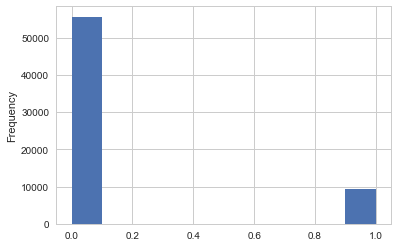

In [36]:
high_crime_var = block_crimes['HighCrimeIDC']
high_crime_var.plot(kind='hist')

In [37]:
# list(block_crimes)
block_crimes.isnull().sum()

type                     0
BLOCKCE10                0
TRACTCE10                0
POP100                   0
HU100                    0
PovertyPercentage_1      0
PCT_Male_Unemployed      0
PCT_Female_Unemployed    0
PCT_NonHSGrad            0
PCT_American_Indian      0
PCT_Asian                0
PCT_Black                0
PCT_Hispanic             0
PCT_Other                0
PCT_Pacific_Islander     0
PCT_Two_or_More          0
Crime_Indicator          0
Jan                      0
Feb                      0
Mar                      0
Apr                      0
May                      0
June                     0
July                     0
Aug                      0
Sept                     0
Oct                      0
Nov                      0
Dec                      0
Sun                      0
                        ..
W26                      0
W27                      0
W28                      0
W29                      0
W30                      0
W31                      0
W

In [46]:
# Find index of any null values

#idx = block_crimes.index[block_crimes.isnull().all(1)]
#nans = block_crimes.iloc[idx]
#nans

### Train Test Split
** Not sure how to set up prediction on crime type, so trying code on HighCrimeIDC variable **

In [38]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'type' in block_crimes:
    y = block_crimes['type'].values # get the labels we want
    del block_crimes['type'] # get rid of the class label
    X = block_crimes.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 1000
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=1000, random_state=None, test_size=0.2, train_size=None)


### Logistic Regression

In [39]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None) # get object
# l2 is the penalty method and C is the weight of the penalty

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
cv_accuracies = []
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]

    X_test = X[test_indices]
    y_test = y[test_indices]

    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    #print("====Iteration",iter_num," ====")
    #print("accuracy", acc )
    #print("confusion matrix\n",conf)
    iter_num+=1
    cv_accuracies.append(acc)

print ('Average accuracy in ' + str(num_cv_iterations) + ' CV iterations:')
print (sum(cv_accuracies)/len(cv_accuracies))
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#print(X[:,0].shape)
#index = 0
#for i in X[:,0]:
#    if not np.isfinite(i):
#        print(index, i)
#    index +=1

In [ ]:
# X = np.delete(X, (23818), axis=0) ### Don't use this. It makes the matrix uneven